In [3]:
import tensorflow as tf
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential


training_set=tf.keras.utils.image_dataset_from_directory(
    'Dataset/train',
     labels='inferred',
     label_mode='categorical',
     class_names=None,
     color_mode='rgb',
     batch_size=32,
     image_size=(128,128),
     shuffle=True,
     seed=None,
     validation_split=None,
     subset=None,
     interpolation='bilinear',
     follow_links=False,
     crop_to_aspect_ratio=False
)

validation_set=tf.keras.utils.image_dataset_from_directory(
    'Dataset/valid',
     labels='inferred',
     label_mode='categorical',
     class_names=None,
     color_mode='rgb',
     batch_size=32,
     image_size=(128,128),
     shuffle=True,
     seed=None,
     validation_split=None,
     subset=None,
     interpolation='bilinear',
     follow_links=False,
     crop_to_aspect_ratio=False
)


model=Sequential()

model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))


model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))


model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))


model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(units=1500,activation='relu'))

model.add(Dropout(0.4))

model.add(Dense(units=38,activation='softmax'))




model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()


Found 70295 files belonging to 38 classes.
Found 17572 files belonging to 38 classes.


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:

training_history=model.fit(x=training_set,validation_data=validation_set,epochs=10)

train_loss,train_acc=model.evaluate(training_set)
val_loss,val_acc=model.evaluate(validation_set)

model.save("trained_model.keras")


Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 4535s 2s/step - accuracy: 0.3965 - loss: 2.1399 - val_accuracy: 0.8290 - val_loss: 0.5449
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2591s 1s/step - accuracy: 0.8298 - loss: 0.5405 - val_accuracy: 0.8914 - val_loss: 0.3353
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2632s 1s/step - accuracy: 0.9057 - loss: 0.2954 - val_accuracy: 0.9155 - val_loss: 0.2622
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2610s 1s/step - accuracy: 0.9339 - loss: 0.1979 - val_accuracy: 0.9333 - val_loss: 0.2155
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2547s 1s/step - accuracy: 0.9503 - loss: 0.1474 - val_accuracy: 0.9504 - val_loss: 0.1594
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2641s 1s/step - accuracy: 0.9610 - loss: 0.1159 - val_accuracy: 0.9512 - val_loss: 0.1546
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2665s 1s/step - accuracy: 0.9707 - loss: 0.0904 - val_accuracy: 0.9593 - val_loss: 0.1318
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 5310s 2s/step - accuracy: 0.9741 -

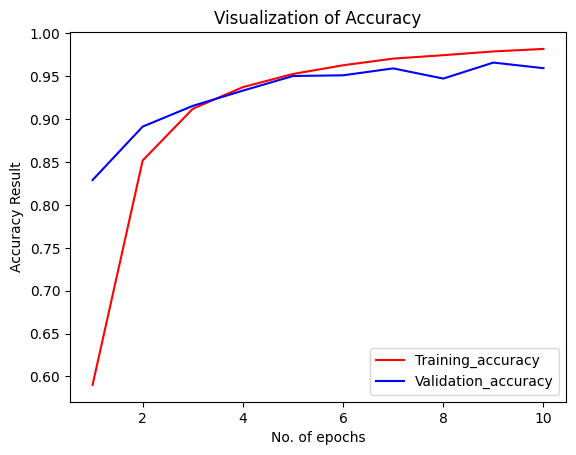

In [5]:

import json
with open("training_hist.json", "w") as f:
    json.dump(training_history.history, f)

epochs = [i for i in range(1, 11)]
plt.plot(epochs, training_history.history['accuracy'], color='red', label='Training_accuracy')

plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation_accuracy')
plt.xlabel("No. of epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy")
plt.legend()
plt.show()


In [6]:
test_set=tf.keras.utils.image_dataset_from_directory(
    'Dataset/valid',
     labels='inferred',
     label_mode='categorical',
     class_names=None,
     color_mode='rgb',
     batch_size=32,
     image_size=(128,128),
     shuffle=False,
     seed=None,
     validation_split=None,
     subset=None,
     interpolation='bilinear',
     follow_links=False,
     crop_to_aspect_ratio=False
)


Found 17572 files belonging to 38 classes.


In [7]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [8]:
y_pred=model.predict(test_set)
y_pred

550/550 ━━━━━━━━━━━━━━━━━━━━ 175s 315ms/step


array([[9.9997675e-01, 3.2195704e-08, 9.1225116e-10, ..., 1.7531965e-12,
        1.0654219e-12, 1.0213606e-10],
       [9.9779820e-01, 1.3312584e-06, 2.2741005e-09, ..., 5.3630961e-11,
        5.8637179e-12, 9.3589159e-10],
       [9.9999964e-01, 1.1069755e-10, 4.4112357e-12, ..., 4.6443647e-17,
        1.6531860e-15, 3.1169322e-13],
       ...,
       [1.3883198e-09, 1.5685347e-12, 1.5653093e-09, ..., 9.3663688e-12,
        1.6215952e-11, 9.9999845e-01],
       [6.3731237e-10, 1.3176871e-13, 8.9122591e-11, ..., 2.2373292e-11,
        4.0255967e-12, 1.0000000e+00],
       [2.2435694e-13, 2.3402909e-14, 1.5408965e-13, ..., 3.8288258e-14,
        1.6108878e-11, 9.9999774e-01]], dtype=float32)

In [9]:
predicted_categories=tf.argmax(y_pred,axis=1)


In [10]:
true_categories = tf.concat([y for x,y in test_set] , axis=0 )
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [11]:
Y_true= tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [12]:

from sklearn.metrics import classification_report ,confusion_matrix
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.99      0.94      0.97       504
                                 Apple___Black_rot       0.99      0.96      0.97       497
                          Apple___Cedar_apple_rust       0.98      0.96      0.97       440
                                   Apple___healthy       0.96      0.96      0.96       502
                               Blueberry___healthy       0.97      0.98      0.98       454
          Cherry_(including_sour)___Powdery_mildew       0.98      0.98      0.98       421
                 Cherry_(including_sour)___healthy       1.00      0.91      0.96       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.89      0.96      0.92       410
                       Corn_(maize)___Common_rust_       0.99      1.00      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.97      0.89      0.

In [13]:
cm= confusion_matrix(Y_true,predicted_categories)
cm.shape

(38, 38)

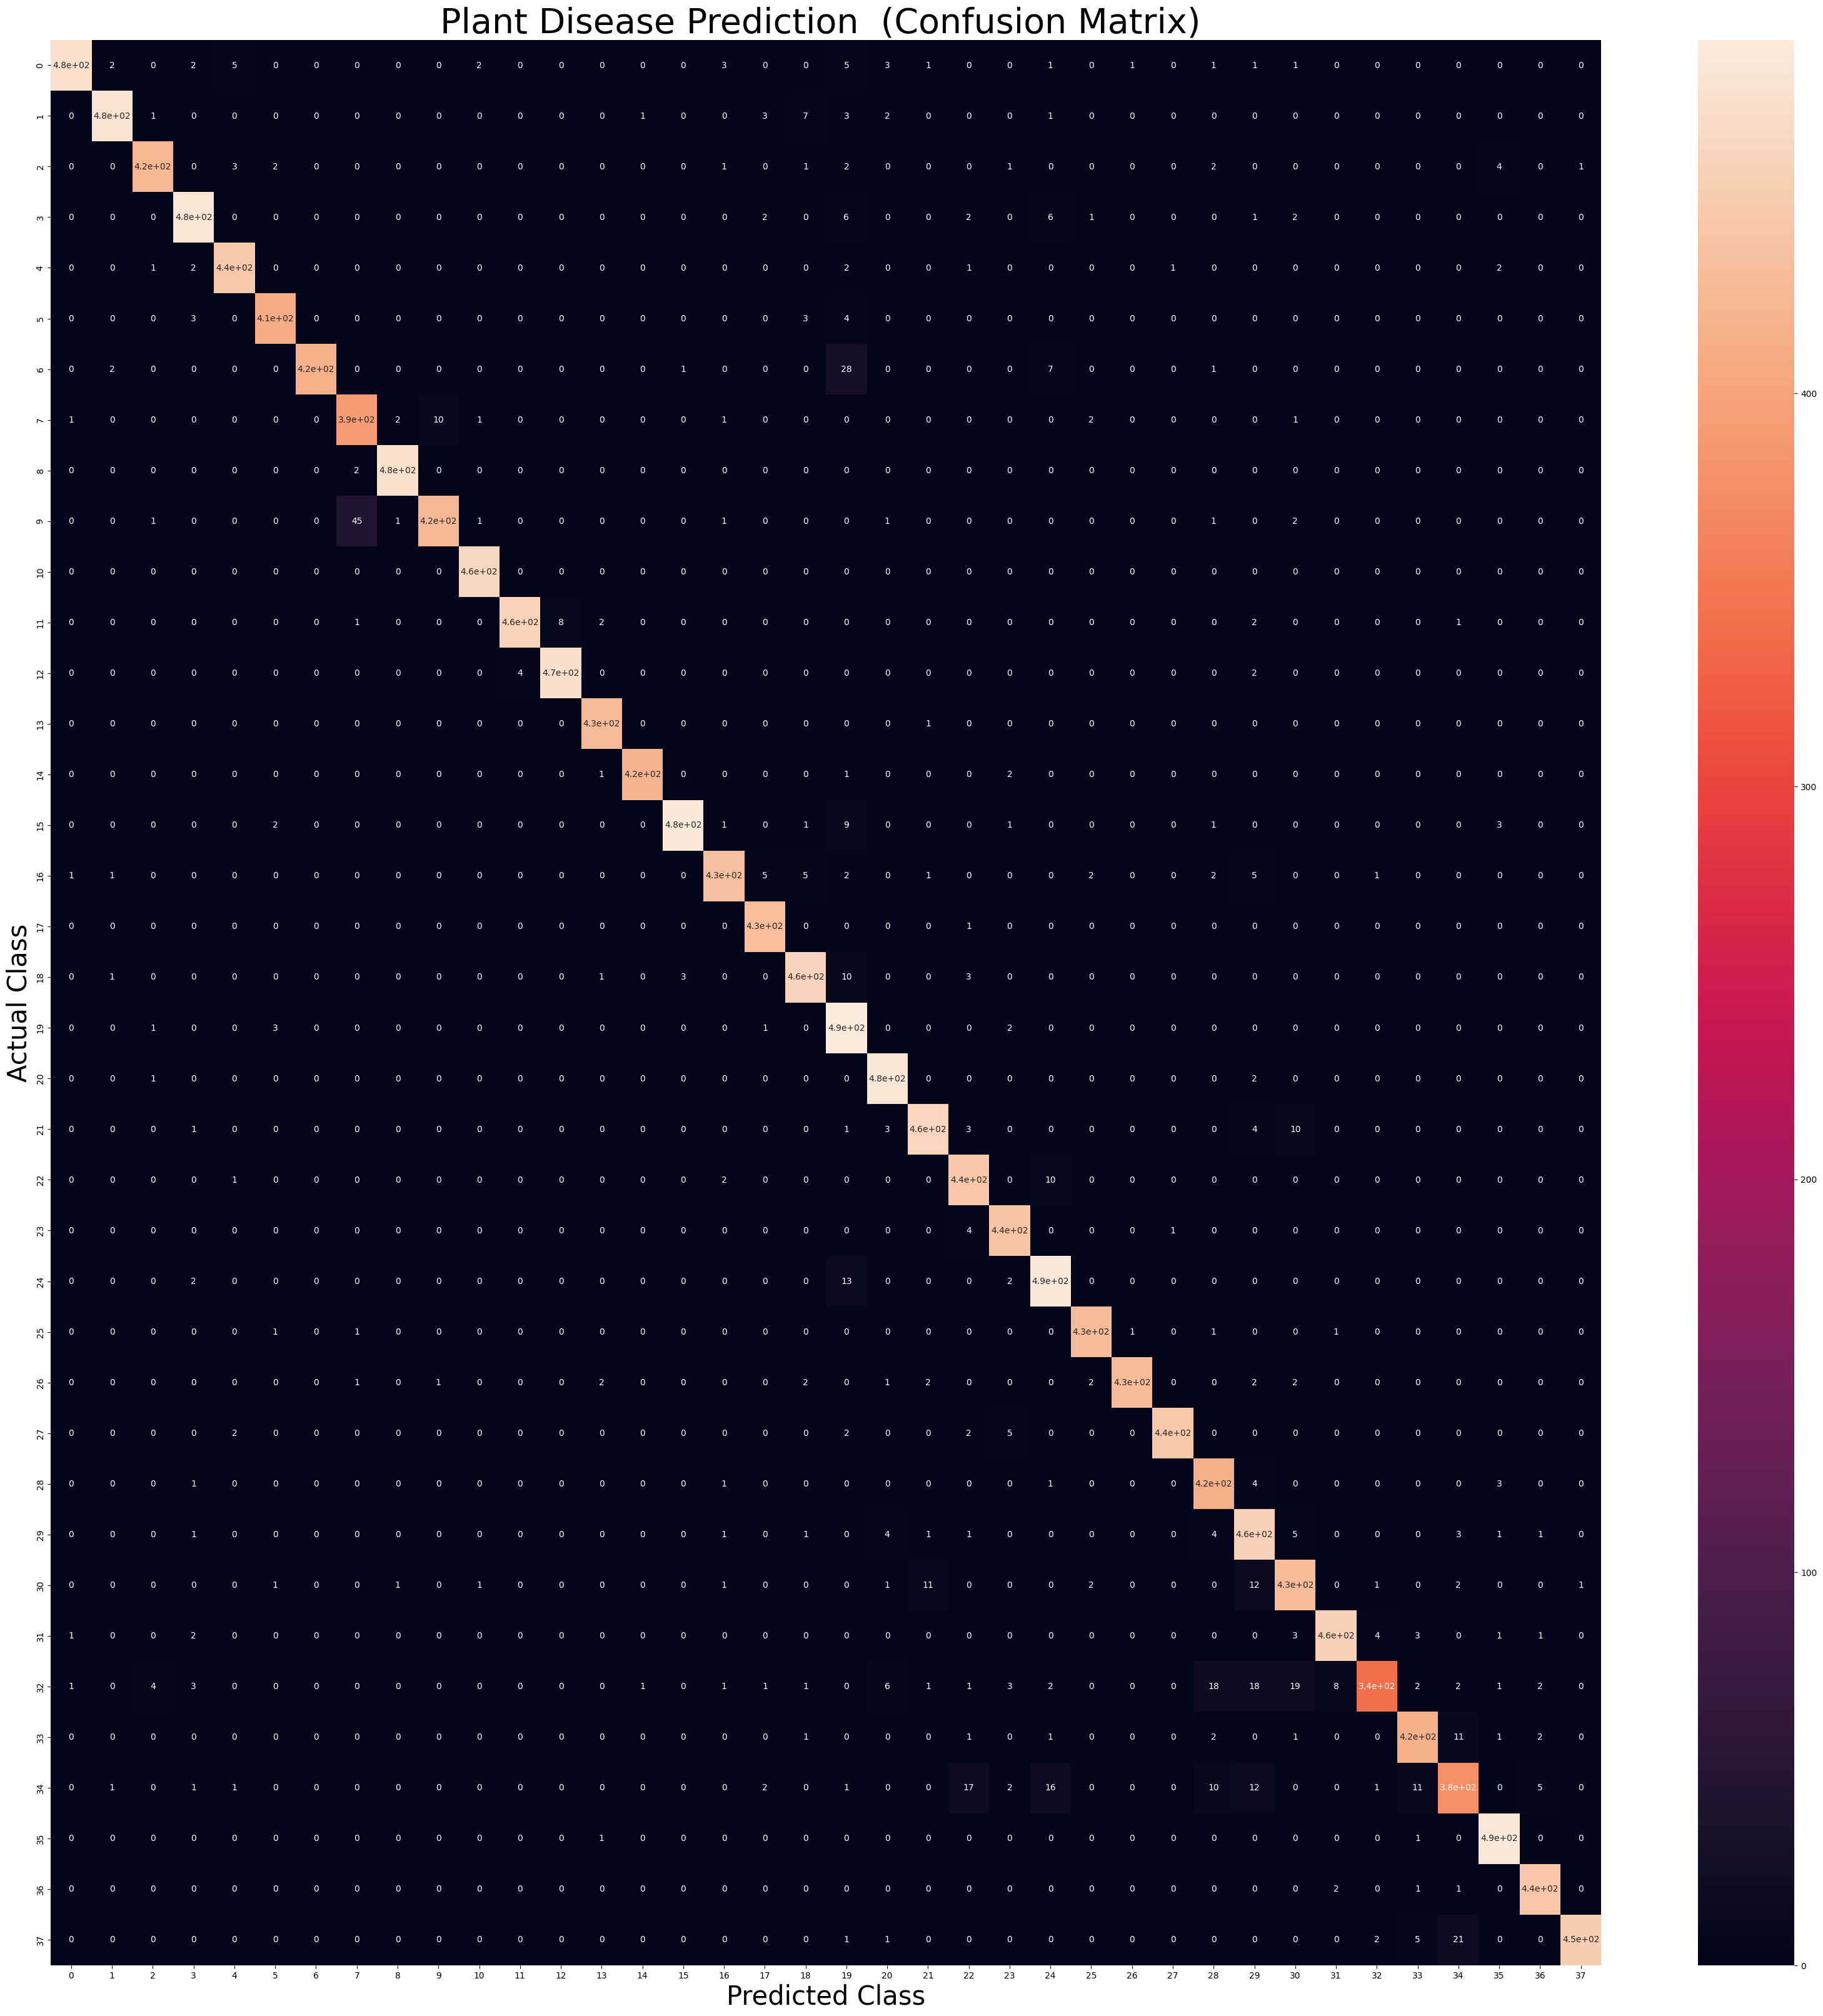

In [14]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel("Predicted Class",fontsize=30)
plt.ylabel("Actual Class",fontsize=30)
plt.title("Plant Disease Prediction  (Confusion Matrix) " , fontsize=40)
plt.show()